# Aykırı Gözlem Analizi

## Aykırı Değerleri Yakalamak

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [5]:
df_diamonds = sns.load_dataset("diamonds")

In [6]:
df = df_diamonds.copy()

In [7]:
import researchpy as rp

In [8]:
df_diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [9]:
rp.summary_cont(df_diamonds.select_dtypes(include="number"))

C:\Users\ASUS ROG STRIX\AppData\Roaming\Python\Python312\site-packages\researchpy\summary.py:102: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'carat' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  table_a.iloc[0,0] = ix
C:\Users\ASUS ROG STRIX\AppData\Roaming\Python\Python312\site-packages\researchpy\summary.py:102: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'depth' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  table_a.iloc[0,0] = ix
C:\Users\ASUS ROG STRIX\AppData\Roaming\Python\Python312\site-packages\researchpy\summary.py:102: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'table' has dtype incompatible with float64, please explicitly cast to a compa

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,carat,53940.0,0.7979,0.4740,0.0020,0.7939,0.8019
1,depth,53940.0,61.7494,1.4326,0.0062,61.7373,61.7615
2,table,53940.0,57.4572,2.2345,0.0096,57.4383,57.4760
3,price,53940.0,3932.7997,3989.4397,17.1774,3899.1320,3966.4675
4,x,53940.0,5.7312,1.1218,0.0048,5.7217,5.7406
5,y,53940.0,5.7345,1.1421,0.0049,5.7249,5.7442
6,z,53940.0,3.5387,0.7057,0.0030,3.5328,3.5447


In [10]:
rp.summary_cat(df_diamonds.select_dtypes(exclude = "number"))

,Variable,Outcome,Count,Percent
0,cut,Ideal,21551,39.95
1,,Premium,13791,25.57
2,,Very Good,12082,22.40
3,,Good,4906,9.10
4,,Fair,1610,2.98
5,color,G,11292,20.93
6,,E,9797,18.16
7,,F,9542,17.69
8,,H,8304,15.39
9,,D,6775,12.56


In [11]:
df_diamonds[["carat","price"]].corr()

,carat,price
carat,1.000000,0.921591
price,0.921591,1.000000


In [12]:
df_diamonds[["carat","price"]].cov()

,carat,price
carat,0.224687,1.742765e+03
price,1742.765364,1.591563e+07


In [13]:
df = df.select_dtypes(include =["float64","int64"])
df = df.dropna()
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [14]:
df_table = df.table

In [15]:
df_table.head()

0    55.0
1    61.0
2    65.0
3    58.0
4    58.0
Name: table, dtype: float64

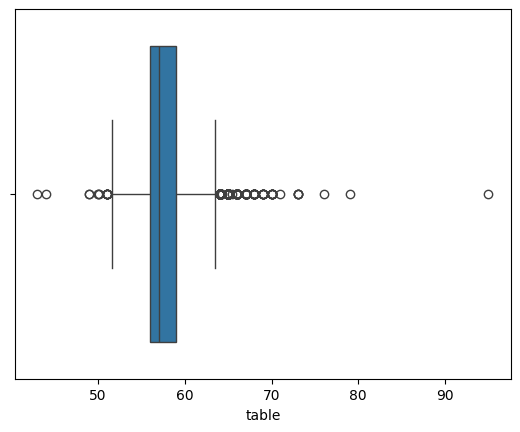

In [16]:
sns.boxplot(x = df_table)
plt.show()

In [17]:
Q1 = df.table.quantile(0.25)
Q3 = df.table.quantile(0.75)
IQR = Q3 - Q1

In [18]:
Q1

56.0

In [19]:
Q3

59.0

In [20]:
IQR

3.0

In [21]:
alt_sinir = Q1 - (1.5*IQR)
ust_sinir = Q3 + (1.5*IQR)

In [22]:
print("Alt Sınır :",alt_sinir)
print("Üst Sınır :",ust_sinir)

Alt Sınır : 51.5
Üst Sınır : 63.5


In [23]:
(df_table < alt_sinir) | (df_table > ust_sinir)

0        False
1        False
2         True
3        False
4        False
         ...  
53935    False
53936    False
53937    False
53938    False
53939    False
Name: table, Length: 53940, dtype: bool

In [24]:
aykiri_alt = (df_table < alt_sinir)

In [25]:
aykiri_ust = (df_table > ust_sinir)

In [26]:
aykiri_altust = (df_table < alt_sinir) | (df_table > ust_sinir)

In [27]:
df_table[aykiri_alt].count() + df_table[aykiri_ust].count()

605

In [28]:
df_table[aykiri_altust].count()

605

In [29]:
df_table[aykiri_altust].index

Index([    2,    91,   145,   219,   227,   239,   296,   314,   356,   359,
       ...
       53226, 53503, 53542, 53577, 53660, 53695, 53697, 53756, 53757, 53785],
      dtype='int64', length=605)

In [30]:
df_price = df.price

In [31]:
df_price

0         326
1         326
2         327
3         334
4         335
         ... 
53935    2757
53936    2757
53937    2757
53938    2757
53939    2757
Name: price, Length: 53940, dtype: int64

In [32]:
q1 = df.price.quantile(0.25)
q3 = df.price.quantile(0.75)

In [33]:
q1

950.0

In [34]:
IQR_price = q3 - q1
IQR_price

4374.25

In [35]:
ust_esik = q3 + (3*IQR_price)
ust_esik

18447.0

In [36]:
df_price.max()

18823

In [37]:
df_price[df_price > ust_esik]

27600    18458
27601    18462
27602    18462
27603    18468
27604    18470
         ...  
27745    18803
27746    18804
27747    18806
27748    18818
27749    18823
Name: price, Length: 120, dtype: int64

## Aykırı Değer Problemini Çözme

In [39]:
df_table[aykiri_altust]

2        65.0
91       69.0
145      64.0
219      64.0
227      67.0
         ... 
53695    65.0
53697    65.0
53756    64.0
53757    64.0
53785    65.0
Name: table, Length: 605, dtype: float64

### Aykırı Değerleri Silme

In [41]:
type(df_table)

pandas.core.series.Series

In [42]:
df_table = pd.DataFrame(df_table)

In [43]:
df_table.head()

,table
0,55.0
1,61.0
2,65.0
3,58.0
4,58.0


In [44]:
df_table.count()

table    53940
dtype: int64

In [45]:
df_table[aykiri_alt].count() + df_table[aykiri_ust].count()

table    605
dtype: int64

In [46]:
clean_df = df_table[~ ((df_table < alt_sinir) | (df_table > ust_sinir)).any(axis=1)]

In [47]:
clean_df.shape

(53335, 1)

### Aykırı Değerleri Ortalama ile Değiştirme

In [49]:
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [165]:
df_table = df["table"]

In [167]:
df_table

0        55.0
1        61.0
2        65.0
3        58.0
4        58.0
         ... 
53935    57.0
53936    55.0
53937    60.0
53938    58.0
53939    55.0
Name: table, Length: 53940, dtype: float64

In [169]:
df_table.mean()

57.45718390804598

In [173]:
df_table[aykiri_altust] = df_table.mean()

C:\Users\ASUS ROG STRIX\AppData\Local\Temp\ipykernel_16512\618813667.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_table[aykiri_altust] = df_table.mean()


In [177]:
df_table[aykiri_altust]

2        57.457184
91       57.457184
145      57.457184
219      57.457184
227      57.457184
           ...    
53695    57.457184
53697    57.457184
53756    57.457184
53757    57.457184
53785    57.457184
Name: table, Length: 605, dtype: float64

### Baskılama Yöntemi

In [213]:
alt_sinir

51.5

In [215]:
ust_sinir

63.5

In [204]:
df_table[aykiri_alt] = alt_sinir

In [206]:
df_table[aykiri_ust] = ust_sinir

In [211]:
df_table[aykiri_alt]

1515     51.5
3238     51.5
3979     51.5
4150     51.5
5979     51.5
7418     51.5
8853     51.5
11368    51.5
22701    51.5
25179    51.5
26387    51.5
33586    51.5
35633    51.5
45798    51.5
46040    51.5
47630    51.5
Name: table, dtype: object

In [217]:
df_table[aykiri_ust]

2        63.5
91       63.5
145      63.5
219      63.5
227      63.5
         ... 
53695    63.5
53697    63.5
53756    63.5
53757    63.5
53785    63.5
Name: table, Length: 589, dtype: object